# Simple visualization of geospatial data

Welcome to Jupyter Notebooks. In this notebook you will be loading some of the data you used previously (`cities` and `countries`) and working with `fiona` and some additional python libraries (`geopandas`, `shapefile`, `matplotlib`, and `descartes` to visualize and manipulate these spatial datasets.

## Install python libraries
Your jupyter environment (aka `kernel` is unlikely to have these libraries installed so you will have to install them yourself. The process is different depending on which package manager you are using. The cell below contains the command to install these for `conda`; if you are using `pip`, then replace the cell contents with the section below for `pip` users:

## For `conda` users
```
import sys
!conda install --yes --prefix {sys.prefix} fiona matplotlib shapefile descartes geopandas
```
### For `pip` users:
```
import sys
!{sys.executable} -m pip install fiona matplotlib shapefile descartes geopandas
```

In [2]:
import fiona
from matplotlib import path
import matplotlib.pyplot as plt
from fiona import collection
import shapefile as shp
from matplotlib import pyplot
from descartes import PolygonPatch

This tells jupyter to plot in the browser

In [ ]:
%matplotlib inline

## Fiona
Use `fiona` to open the airports data you worked with previously.

In [21]:
airports_fiona = fiona.open('data/ne_10m_airports.shp','r')

Take a look at the schema and you will see a number of attributes and their datatypes. Notice that the schema is a dictionary containing `properties` and `geometry` and the `properties` itself is a reference to an `OrderedDict` containing the names and types of all the properties.

In [4]:
airports_fiona.schema

{'properties': OrderedDict([('scalerank', 'int:4'),
              ('featurecla', 'str:80'),
              ('type', 'str:50'),
              ('name', 'str:200'),
              ('abbrev', 'str:4'),
              ('location', 'str:50'),
              ('gps_code', 'str:254'),
              ('iata_code', 'str:254'),
              ('wikipedia', 'str:254'),
              ('natlscale', 'float:8.3'),
              ('comments', 'str:254'),
              ('wikidataid', 'str:254'),
              ('name_ar', 'str:254'),
              ('name_bn', 'str:254'),
              ('name_de', 'str:254'),
              ('name_en', 'str:254'),
              ('name_es', 'str:254'),
              ('name_fr', 'str:254'),
              ('name_el', 'str:254'),
              ('name_hi', 'str:254'),
              ('name_hu', 'str:254'),
              ('name_id', 'str:254'),
              ('name_it', 'str:254'),
              ('name_ja', 'str:254'),
              ('name_ko', 'str:254'),
              ('name_nl', 'str:

Iterate over the records in the airports shapefile and print their geometry, which fiona represents internally as `GeoJSON` format

In [5]:
for f in airports_fiona:
    print(f['geometry'])

{'type': 'Point', 'coordinates': (75.95707224036518, 30.850359856170176)}
{'type': 'Point', 'coordinates': (75.93305977107549, 17.625415183635024)}
{'type': 'Point', 'coordinates': (85.3235970368767, 23.317724598996193)}
{'type': 'Point', 'coordinates': (48.74710654359313, 31.343158556075725)}
{'type': 'Point', 'coordinates': (78.21721865463483, 26.28548769793701)}
{'type': 'Point', 'coordinates': (42.97109630194003, 14.755253441372462)}
{'type': 'Point', 'coordinates': (75.8092915005895, 22.72774918757095)}
{'type': 'Point', 'coordinates': (73.81056749246886, 19.966020567280626)}
{'type': 'Point', 'coordinates': (76.80172611052417, 30.670724894966725)}
{'type': 'Point', 'coordinates': (75.39584329220051, 19.867296962108234)}
{'type': 'Point', 'coordinates': (72.9878190922305, 31.362743548086222)}
{'type': 'Point', 'coordinates': (73.3163595376585, 54.95764829340594)}
{'type': 'Point', 'coordinates': (82.66715245258652, 55.00958471362636)}
{'type': 'Point', 'coordinates': (35.301872857

{'type': 'Point', 'coordinates': (-0.3762272673974393, 51.8802952570969)}
{'type': 'Point', 'coordinates': (15.495229, 78.246717)}
{'type': 'Point', 'coordinates': (-77.91839076357516, 18.501154929824885)}
{'type': 'Point', 'coordinates': (95.97065359502169, 21.705549068027405)}
{'type': 'Point', 'coordinates': (-87.74212668856121, 41.78834925974092)}
{'type': 'Point', 'coordinates': (-80.68338459957742, -0.9495570021128831)}
{'type': 'Point', 'coordinates': (-86.39030746026862, 32.304587990963064)}
{'type': 'Point', 'coordinates': (-71.43752390918567, 42.92791399458855)}
{'type': 'Point', 'coordinates': (13.085139016247085, 11.853471318852687)}
{'type': 'Point', 'coordinates': (23.572109198905228, -6.1248454134881145)}
{'type': 'Point', 'coordinates': (-101.29138553129988, 48.25560492128391)}
{'type': 'Point', 'coordinates': (-114.08369492365063, 46.91876047688307)}
{'type': 'Point', 'coordinates': (-115.24787404784124, 32.628564332460684)}
{'type': 'Point', 'coordinates': (8.71295953

In [37]:
coords = [list(rec['geometry']['coordinates']) for rec in airports_fiona]

In [43]:
coords2 = list(map(list, zip(*coords)))

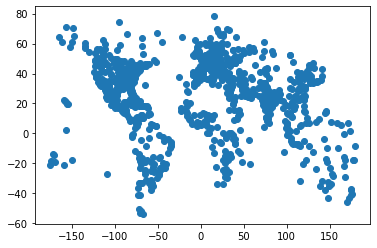

In [45]:
pyplot.scatter(coords2[0],coords2[1])

To view data loaded from `fiona` we need to create a plot and add the data. This is less intuitive than other methods but exposes the internal workings of how these algorithms work generally. This example uses the `descartes` library to consolidate the geometries into `PolygonPatches`

(-90, 90)

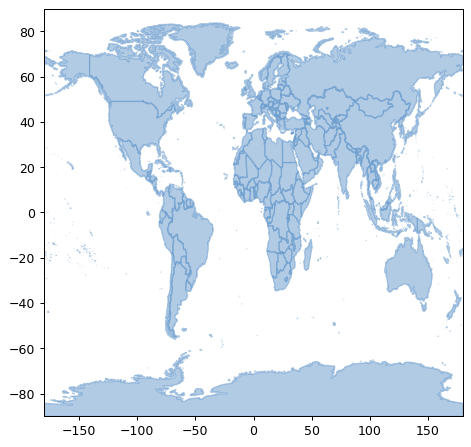

In [16]:
# Set up the figure and axes.
BLUE = '#6699cc'
fig = pyplot.figure(1, figsize=(6, 6), dpi=90)
ax = fig.add_subplot(111)

# For each feature in the collection, add a patch to the axes.
with collection('data/ne_10m_admin_0_countries.shp', "r") as input:
    for f in input:
        ax.add_patch(
            PolygonPatch(
                f['geometry'], fc=BLUE, ec=BLUE, alpha=0.5 ))

# Should be able to get extents from the collection in a future version
# of Fiona.
ax.set_xlim(-180, 180)
ax.set_ylim(-90, 90)

## GeoPandas
GeoPandas is another spatial library which provides simple loading of data and more summarizing and analysis options through its extension of the `Pandas` library, a popular library used for scientific analysis. You will likely find this more intuitive than `fiona`.

First, import the library and then we will immediately re-open the airports file in this new library. 

In [9]:
import geopandas as gpd
airports_gpd = gpd.read_file('data/ne_10m_airports.shp')

Inspect the data loaded by GeoPandas. The object obtained from `read_file` is a `GeoDataFrame` and it comes with convenenient methods for previewing the data. To look at the first 4 lines of the attribute table, use `head()`:

In [15]:
airports_gpd.head(4)

,scalerank,featurecla,type,name,abbrev,location,gps_code,iata_code,wikipedia,natlscale,...,name_pl,name_pt,name_ru,name_sv,name_tr,name_vi,name_zh,wdid_score,ne_id,geometry
0,9,Airport,small,Sahnewal,LUH,terminal,VILD,LUH,http://en.wikipedia.org/wiki/Sahnewal_Airport,8.0,...,None,None,None,Ludhiana Airport,None,None,None,4,1159113785,POINT (75.95707 30.85036)
1,9,Airport,mid,Solapur,SSE,terminal,VASL,SSE,http://en.wikipedia.org/wiki/Solapur_Airport,8.0,...,None,None,None,None,None,None,None,4,1159113803,POINT (75.93306 17.62542)
2,9,Airport,mid,Birsa Munda,IXR,terminal,VERC,IXR,http://en.wikipedia.org/wiki/Birsa_Munda_Airport,8.0,...,Port lotniczy Ranchi,None,None,M. O. Ranchi,None,Sân bay Birsa Munda,蘭契,4,1159113831,POINT (85.32360 23.31772)
3,9,Airport,mid,Ahwaz,AWZ,terminal,OIAW,AWZ,http://en.wikipedia.org/wiki/Ahwaz_Airport,8.0,...,Port lotniczy Ahwaz,None,None,Ahwaz International Airport,Ahvaz Havalimanı,Sân bay Ahvaz,阿瓦士,4,1159113845,POINT (48.74711 31.34316)


In [11]:
type(airports_gpd)

geopandas.geodataframe.GeoDataFrame

Find the bounding box of the data

In [12]:
airports_gpd.total_bounds

array([-175.135635  ,  -53.78147461,  179.19544202,   78.246717  ])

Get the Coordinate Reference System

In [18]:
airports_gpd.crs

{'init': 'epsg:4326'}

See the dimensions of the attribute table `(rows, columns)` using `shape()`, which can be called on other objects that are `DataFrame` or `numpy` arrays.

In [19]:
airports_gpd.shape

(891, 36)

`GeoDataFrame` objects are pretty simple to plot. Just call the `plot` method referencing a `matplotlib` figure.

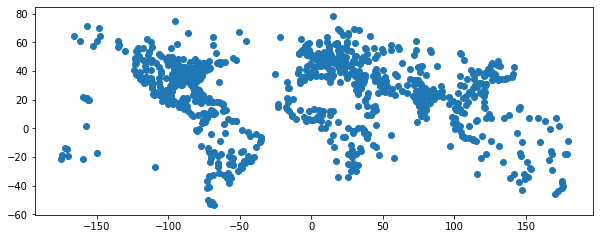

In [14]:
fig, ax = plt.subplots(figsize = (10,10))
airports_gpd.plot(ax=ax)
plt.show()

It will look a little better if add some transparency.

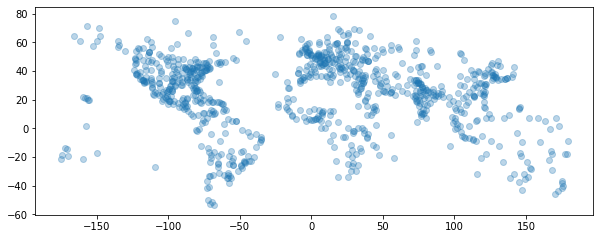

In [15]:
fig, ax = plt.subplots(figsize = (10,10))
airports_gpd.plot(ax=ax, alpha=0.3)
plt.show()

Of course, we can also change the symbology and plot different colors for different categories.

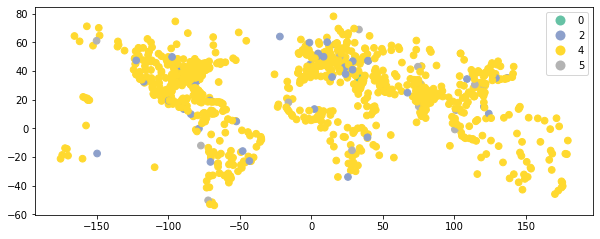

In [21]:
fig, ax = plt.subplots(figsize = (10,10))
airports.plot(column='wdid_score', 
                         categorical=True, 
                         legend=True, 
                         figsize=(10,6),
                         markersize=45, 
                         cmap="Set2", ax=ax);

This is plotted with a numerical scale rather than a categorical scale.

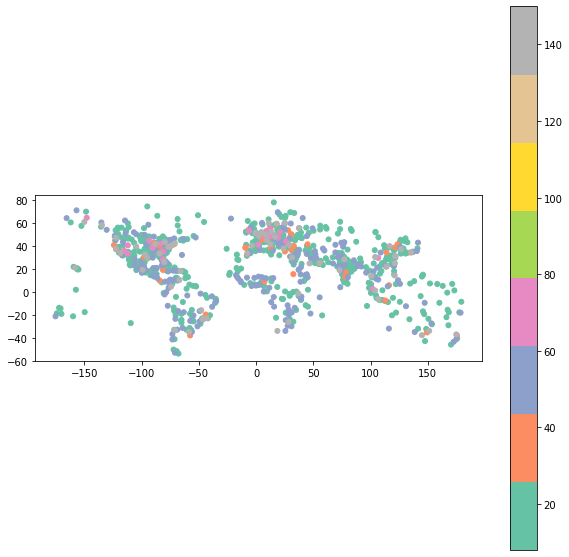

In [22]:
fig, ax = plt.subplots(figsize = (10,10))
airports.plot(column='natlscale', 
                         categorical=False, 
                         legend=True, 
                         figsize=(10,6),
                         markersize=25, 
                         cmap="Set2", ax=ax);

To view data loaded from `fiona` we need to create a plot and add the data. This is less intuitive than other methods but exposes the internal workings of how these algorithms work generally. This example uses the `descartes` library to consolidate the geometries into `PolygonPatches`

In [ ]:
# Set up the figure and axes.
BLUE = '#6699cc'
fig = pyplot.figure(1, figsize=(6, 6), dpi=90)
ax = fig.add_subplot(111)

# For each feature in the collection, add a patch to the axes.
with collection('data/ne_10m_admin_0_countries.shp', "r") as input:
    for f in input:
        ax.add_patch(
            PolygonPatch(
                f['geometry'], fc=BLUE, ec=BLUE, alpha=0.5 ))

# Should be able to get extents from the collection in a future version
# of Fiona.
ax.set_xlim(-180, 180)
ax.set_ylim(-90, 90)

In [23]:
countries = gpd.read_file('data/ne_10m_admin_0_countries.shp')

In [24]:
countries.head(10)

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
0,Admin-0 country,5,2,Indonesia,IDN,0,2,Sovereign country,Indonesia,IDN,...,인도네시아,Indonesië,Indonezja,Indonésia,Индонезия,Indonesien,Endonezya,Indonesia,印度尼西亚,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Admin-0 country,5,3,Malaysia,MYS,0,2,Sovereign country,Malaysia,MYS,...,말레이시아,Maleisië,Malezja,Malásia,Малайзия,Malaysia,Malezya,Malaysia,马来西亚,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Admin-0 country,6,2,Chile,CHL,0,2,Sovereign country,Chile,CHL,...,칠레,Chili,Chile,Chile,Чили,Chile,Şili,Chile,智利,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Admin-0 country,0,3,Bolivia,BOL,0,2,Sovereign country,Bolivia,BOL,...,볼리비아,Bolivia,Boliwia,Bolívia,Боливия,Bolivia,Bolivya,Bolivia,玻利維亞,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Admin-0 country,0,2,Peru,PER,0,2,Sovereign country,Peru,PER,...,페루,Peru,Peru,Peru,Перу,Peru,Peru,Peru,秘鲁,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."
5,Admin-0 country,0,2,Argentina,ARG,0,2,Sovereign country,Argentina,ARG,...,아르헨티나,Argentinië,Argentyna,Argentina,Аргентина,Argentina,Arjantin,Argentina,阿根廷,"MULTIPOLYGON (((-67.28475 -23.83414, -67.25133..."
6,Admin-0 country,3,3,United Kingdom,GB1,1,2,Dependency,Dhekelia Sovereign Base Area,ESB,...,데켈리아 지역,Dhekelia Cantonment,Dhekelia,Dekelia,Декелия,Dhekelia,Dhekelia Kantonu,Căn cứ quân sự Dhekelia,None,"POLYGON ((33.78094 34.97635, 33.76043 34.97968..."
7,Admin-0 country,6,5,Cyprus,CYP,0,2,Sovereign country,Cyprus,CYP,...,키프로스,Cyprus,Cypr,Chipre,Кипр,Cypern,Kıbrıs Cumhuriyeti,Cộng hòa Síp,賽普勒斯,"MULTIPOLYGON (((33.78183 34.97622, 33.78094 34..."
8,Admin-0 country,0,2,India,IND,0,2,Sovereign country,India,IND,...,인도,India,Indie,Índia,Индия,Indien,Hindistan,Ấn Độ,印度,"MULTIPOLYGON (((77.80035 35.49541, 77.81533 35..."
9,Admin-0 country,0,2,China,CH1,1,2,Country,China,CHN,...,중화인민공화국,Volksrepubliek China,Chińska Republika Ludowa,China,Китайская Народная Республика,Kina,Çin Halk Cumhuriyeti,Cộng hòa Nhân dân Trung Hoa,中华人民共和国,"MULTIPOLYGON (((78.91595 33.38766, 78.82426 33..."


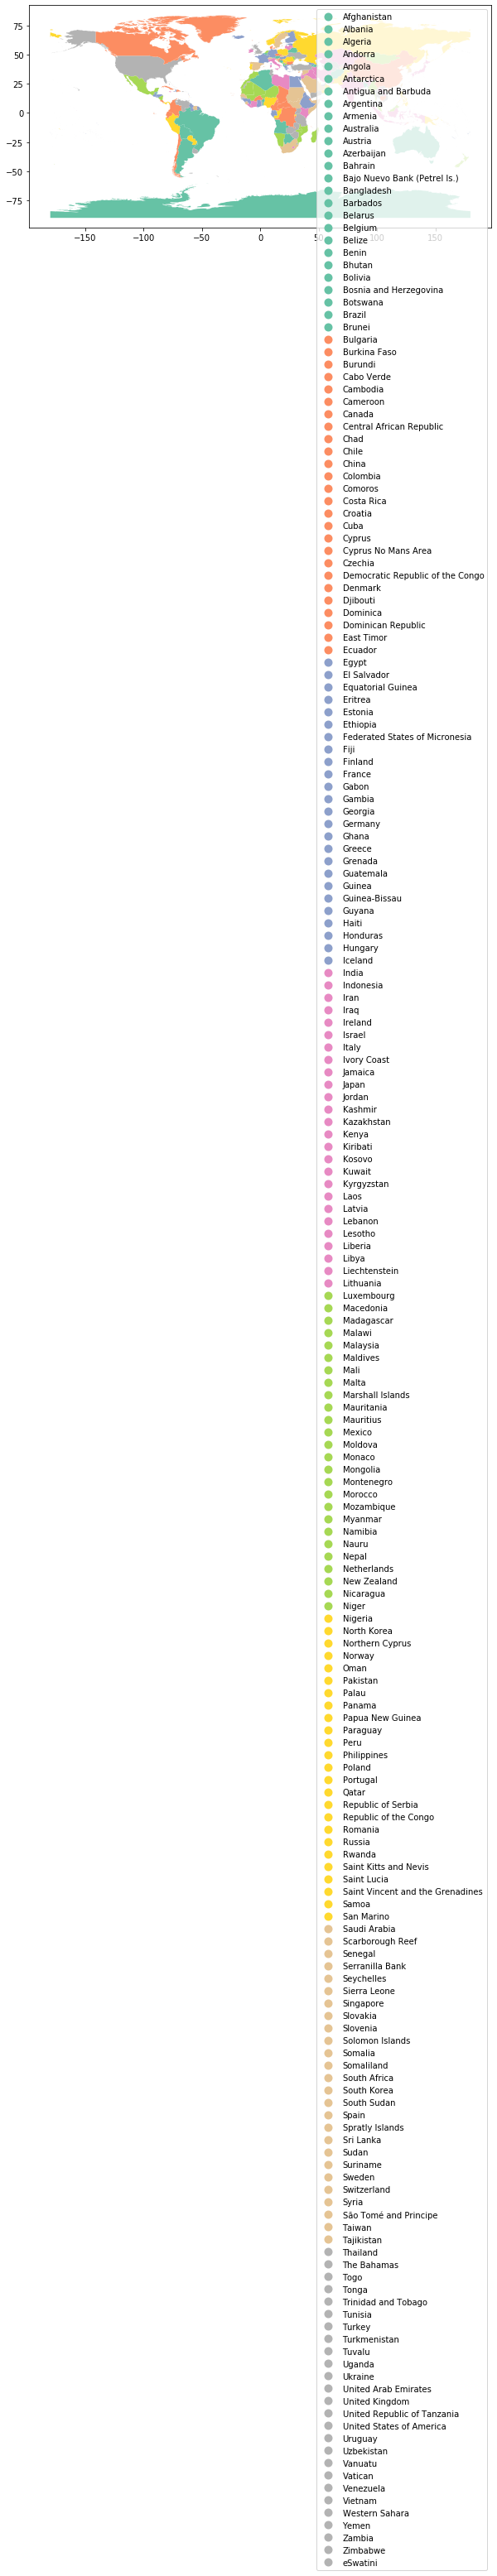

In [25]:
fig, ax = plt.subplots(figsize = (10,10))
countries.plot(column='SOVEREIGNT', 
                         categorical=True, 
                         legend=True, 
                         figsize=(10,6),
                         cmap="Set2", ax=ax);

In [26]:
airports.head(20)

,scalerank,featurecla,type,name,abbrev,location,gps_code,iata_code,wikipedia,natlscale,...,name_pl,name_pt,name_ru,name_sv,name_tr,name_vi,name_zh,wdid_score,ne_id,geometry
0,9,Airport,small,Sahnewal,LUH,terminal,VILD,LUH,http://en.wikipedia.org/wiki/Sahnewal_Airport,8.0,...,None,None,None,Ludhiana Airport,None,None,None,4,1159113785,POINT (75.95707 30.85036)
1,9,Airport,mid,Solapur,SSE,terminal,VASL,SSE,http://en.wikipedia.org/wiki/Solapur_Airport,8.0,...,None,None,None,None,None,None,None,4,1159113803,POINT (75.93306 17.62542)
2,9,Airport,mid,Birsa Munda,IXR,terminal,VERC,IXR,http://en.wikipedia.org/wiki/Birsa_Munda_Airport,8.0,...,Port lotniczy Ranchi,None,None,M. O. Ranchi,None,Sân bay Birsa Munda,蘭契,4,1159113831,POINT (85.32360 23.31772)
3,9,Airport,mid,Ahwaz,AWZ,terminal,OIAW,AWZ,http://en.wikipedia.org/wiki/Ahwaz_Airport,8.0,...,Port lotniczy Ahwaz,None,None,Ahwaz International Airport,Ahvaz Havalimanı,Sân bay Ahvaz,阿瓦士,4,1159113845,POINT (48.74711 31.34316)
4,9,Airport,mid and military,Gwalior,GWL,terminal,VIGR,GWL,http://en.wikipedia.org/wiki/Gwalior_Airport,8.0,...,Port lotniczy Gwalior,None,None,Gwalior Airport,None,Sân bay Gwalior,瓜廖爾,4,1159113863,POINT (78.21722 26.28549)
5,9,Airport,mid,Hodeidah Int'l,HOD,terminal,OYHD,HOD,http://en.wikipedia.org/wiki/Hodeida_Internati...,8.0,...,Port lotniczy Al-Hudajda,None,None,None,None,None,荷台達國際機場,4,1159113883,POINT (42.97110 14.75525)
6,9,Airport,mid,Devi Ahilyabai Holkar Int'l,IDR,terminal,VAID,IDR,http://en.wikipedia.org/wiki/Devi_Ahilyabai_Ho...,8.0,...,Port lotniczy Indore,None,Ахилия Бай,Devi Ahilyabai Holkar International Airport,None,Sân bay quốc tế Devi Ahilyabai Holkar,印多爾,4,1159113903,POINT (75.80929 22.72775)
7,9,Airport,mid,Gandhinagar,ISK,ramp,VANR,ISK,http://en.wikipedia.org/wiki/Gandhinagar_Airport,8.0,...,None,None,None,None,None,None,None,4,1159113917,POINT (73.81057 19.96602)
8,9,Airport,major and military,Chandigarh Int'l,IXC,terminal,VICG,IXC,http://en.wikipedia.org/wiki/Chandigarh_Airport,8.0,...,Port lotniczy Czandigarh,None,None,Chandigarh Airport,None,None,昌迪加爾機場,4,1159113937,POINT (76.80173 30.67072)
9,9,Airport,mid,Aurangabad,IXU,terminal,VAAU,IXU,http://en.wikipedia.org/wiki/Aurangabad_Airport,8.0,...,Port lotniczy Aurangabad,None,None,Aurangabad Airport,None,Sân bay Aurangabad,奧郎加巴德機場,4,1159113953,POINT (75.39584 19.86730)


In [27]:
import pandas as pd

In [28]:
airport_data = pd.read_csv('data/airport_data.tsv', sep='\t')

In [29]:
airports_exp = airports.merge(airport_data, left_on='iata_code', right_on='CODE')

In [30]:
airports_exp.head(5)

,scalerank,featurecla,type,name,abbrev,location,gps_code,iata_code,wikipedia,natlscale,...,ne_id,geometry,RANK,REG,CODE,Airport,Airport location,Passengers 2011,Passengers 2010,% Change
0,8,Airport,major,Washington Nat'l,DCA,terminal,KDCA,DCA,http://en.wikipedia.org/wiki/Ronald_Reagan_Was...,10.0,...,1159115459,POINT (-77.04334 38.85372),78,NAM,DCA,"WASHINGTON DC, US (DCA)","WASHINGTON DC, US (DCA) Airport",18811335,18105802,3.8
1,8,Airport,major,Chicago Midway Int'l,MDW,terminal,KMDW,MDW,http://en.wikipedia.org/wiki/Chicago_Midway_In...,10.0,...,1159116663,POINT (-87.74213 41.78835),77,NAM,MDW,"CHICAGO IL, US (MDW)","CHICAGO IL, US (MDW) Airport",18882549,17647771,6.5
2,8,Airport,major,Malpensa,MXP,terminal,LIMC,MXP,http://en.wikipedia.org/wiki/Malpensa_Airport,10.0,...,1159116827,POINT (8.71296 45.62744),73,EUR,MXP,"MILAN, IT (MXP)","MILAN, IT (MXP) Airport",19291427,18947808,1.8
3,8,Airport,major,Fukuoka,FUK,terminal,RJFF,FUK,http://en.wikipedia.org/wiki/Fukuoka_Airport,10.0,...,1159118371,POINT (130.44419 33.58482),95,ASP,FUK,"FUKUOKA, JP (FUK)","FUKUOKA, JP (FUK) Airport",15431078,16404617,-6.3
4,7,Airport,major,Moscow Domodedovo Int'l,DME,terminal,UUDD,DME,http://en.wikipedia.org/wiki/Domodedovo_Intern...,15.0,...,1159119395,POINT (37.90025 55.41415),54,EUR,DME,"MOSCOW, RU (DME)","MOSCOW, RU (DME) Airport",25701610,22253529,13.4


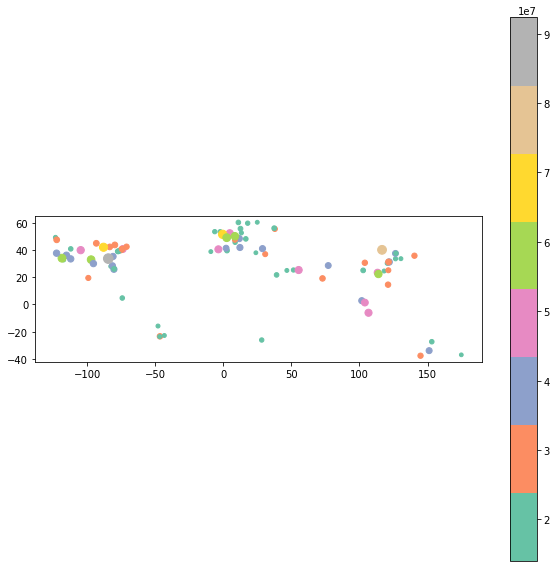

In [31]:
fig, ax = plt.subplots(figsize = (10,10))
airports_exp.plot(column='Passengers 2011', 
                         categorical=False, 
                         legend=True, 
                         figsize=(10,6),
                         markersize=airports_exp['Passengers 2011']*0.000001, 
                         cmap="Set2", ax=ax);

In [32]:
import sys
!{sys.executable} -m pip install ipyleaflet

In [1]:
from ipyleaflet import *
m = Map(center=(32.2, -111.0),zoom=5, basemap=basemaps.Esri.DeLorme)
m


Map(basemap={'url': 'http://server.arcgisonline.com/ArcGIS/rest/services/Specialty/DeLorme_World_Base_Map/MapS…